<a href="https://colab.research.google.com/github/Shivamthakur7500/Bharatintern_projects/blob/main/spamdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING DATA SET DIRECTLY FROM KAGGEL**

In [123]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d uciml/sms-spam-collection-dataset


cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [124]:
import zipfile
zip_ref=zipfile.ZipFile('/content/sms-spam-collection-dataset.zip')
zip_ref.extractall("/content")
zip_ref.close()

# **IMPORTING IMPORTANT LIBRARIES**

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
ds = pd.read_csv("/content/spam.csv", encoding='latin-1')
ds.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **DATA CLEANING**

In [126]:
ds.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] ,inplace=True)
ds.rename(columns={'v1':'type', 'v2':'text'}, inplace=True)
ds.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
data=ds.where(pd.notnull(ds),"")
data.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [129]:
ds.shape

(5572, 2)

#**0 -> HAM**
#**1 -> SPAM**

In [130]:
data.loc[data['type'] == 'ham', 'type',] = 0
data.loc[data['type'] == 'spam', 'type',] = 1

In [131]:
x=data['text']
y=data['type']

In [132]:
print(x,y)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5572, dtype: object


# **SPLITING IN THE DATA SET INTO TWO SETS**




# **1.TRAIN.**
# **2.TEST.**   

In [133]:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [134]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [135]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [136]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

#**Model training**

In [137]:
model=LogisticRegression()
model.fit(x_train_features,y_train)

LogisticRegression()

In [178]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
prediction_on_test_data= model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

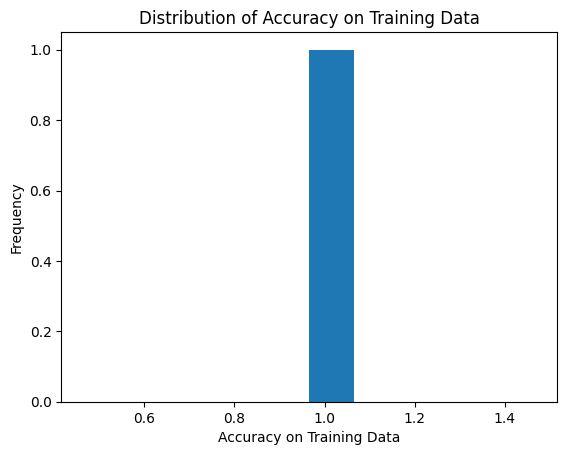

In [185]:
plt.hist(accuracy_on_training_data, bins=10)  # Specify number of bins
plt.xlabel('Accuracy on Training Data')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy on Training Data')
plt.show()

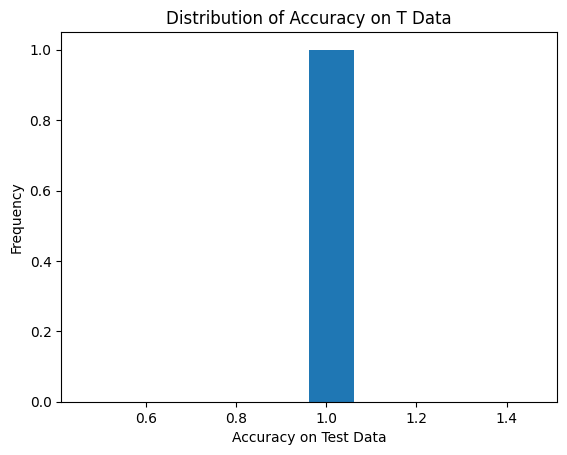

In [186]:
plt.hist(accuracy_on_test_data, bins=10)
plt.xlabel('Accuracy on Test Data')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy on T Data')
plt.show()

In [141]:
print('accuracy of test data:',accuracy_on_test_data)

accuracy of test data: 0.9623318385650225


#**0 -> HAM**
#**1 -> SPAM**

In [187]:
input_mail=[" Free entry in 2 a wkly comp to win FA Cup fina..."]
input_data = feature_extraction.transform(input_mail)
prediction = model.predict(input_data)
print(prediction)
if prediction[0]==0:
  print('HAM MAIL')
else:
  print('SPAM MAIL')

[0]
HAM MAIL
